Implement the Epsilon-Greedy algorithm with a varying epsilon value that decreases over time (e.g.,
𝜖
=
1
/
𝑡
) to see how it affects exploration and exploitation.

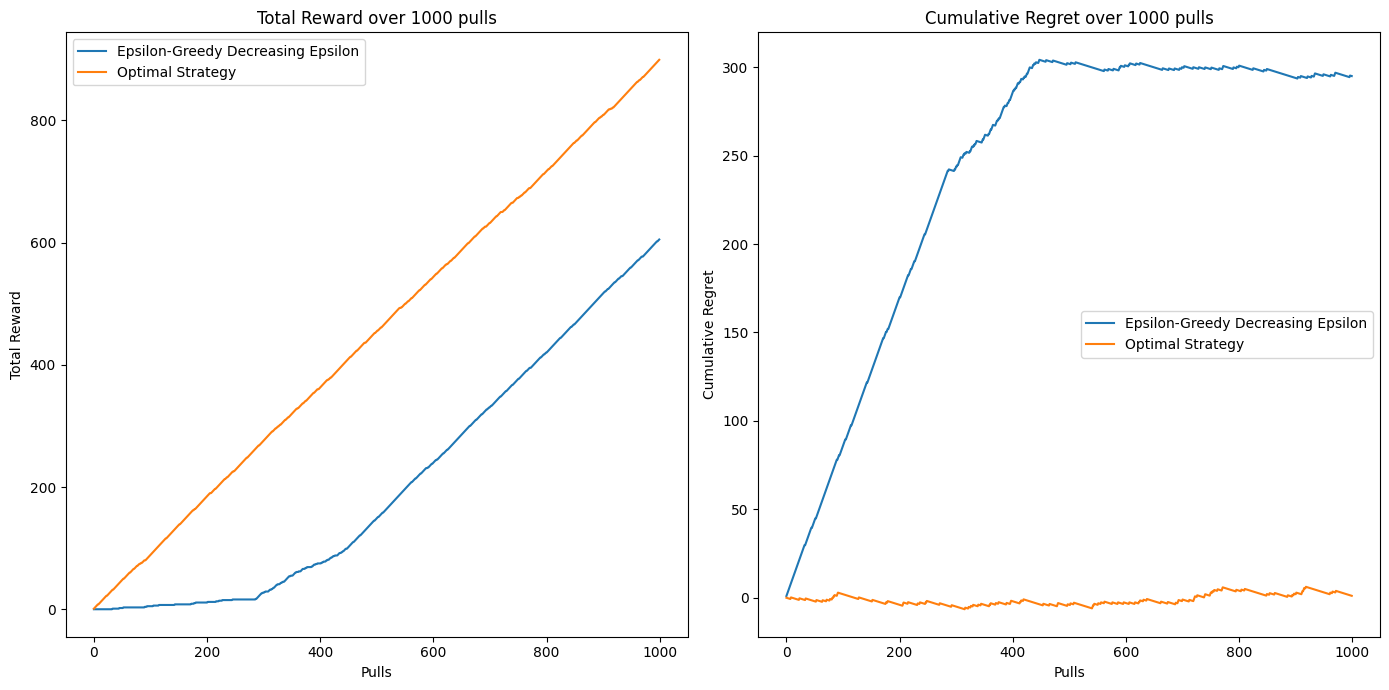

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Bandit environment with multiple arms
class Bandit:
    def __init__(self, probabilities):
        self.probabilities = probabilities

    def pull(self, arm):
        # Simulate pulling an arm and returning a reward
        return 1 if np.random.rand() < self.probabilities[arm] else 0

# Epsilon-Greedy algorithm with decreasing epsilon value
class EpsilonGreedyDecreasingEpsilon:
    def __init__(self, bandit):
        self.bandit = bandit
        self.num_arms = len(bandit.probabilities)
        self.counts = np.zeros(self.num_arms)  # Number of times each arm is pulled
        self.values = np.zeros(self.num_arms)  # Estimated value of each arm
        self.total_pulls = 0

    def select_arm(self):
        # Calculate decreasing epsilon
        epsilon = 1 / (self.total_pulls + 1)
        # Select a random arm with probability epsilon, otherwise select the best arm
        if np.random.rand() < epsilon:
            return np.random.randint(self.num_arms)
        else:
            return np.argmax(self.values)

    def update(self, arm, reward):
        # Update the estimated value of the selected arm based on the received reward
        self.counts[arm] += 1
        self.values[arm] += (reward - self.values[arm]) / self.counts[arm]
        self.total_pulls += 1

# Optimal strategy that always selects the best-known arm
class OptimalStrategy:
    def __init__(self, bandit):
        self.bandit = bandit
        self.optimal_arm = np.argmax(bandit.probabilities)  # Arm with the highest probability

    def select_arm(self):
        # Always select the optimal arm
        return self.optimal_arm

    def update(self, arm, reward):
        # No update needed for the optimal strategy
        pass

# Function to simulate the process of pulling arms using a given strategy
def simulate(bandit, strategy, num_pulls):
    total_reward = 0
    total_rewards = []
    cumulative_regret = 0
    cumulative_regrets = []
    optimal_reward = max(bandit.probabilities)

    for _ in range(num_pulls):
        arm = strategy.select_arm()
        reward = bandit.pull(arm)
        strategy.update(arm, reward)
        total_reward += reward
        regret = optimal_reward - reward
        cumulative_regret += regret

        total_rewards.append(total_reward)
        cumulative_regrets.append(cumulative_regret)

    return total_rewards, cumulative_regrets

# Define the bandit probabilities for each arm
probabilities = [0.1, 0.3, 0.5, 0.7, 0.9]
bandit = Bandit(probabilities)

# Initialize strategies
epsilon_greedy_decreasing = EpsilonGreedyDecreasingEpsilon(bandit)
optimal_strategy = OptimalStrategy(bandit)

# Simulate pulls
num_pulls = 1000
egd_rewards, egd_regrets = simulate(bandit, epsilon_greedy_decreasing, num_pulls)
os_rewards, os_regrets = simulate(bandit, optimal_strategy, num_pulls)

# Plot total rewards comparison
plt.figure(figsize=(14, 7))

# Total reward plot
plt.subplot(1, 2, 1)
plt.plot(egd_rewards, label='Epsilon-Greedy Decreasing Epsilon')
plt.plot(os_rewards, label='Optimal Strategy')
plt.xlabel('Pulls')
plt.ylabel('Total Reward')
plt.legend()
plt.title('Total Reward over 1000 pulls')

# Cumulative regret plot
plt.subplot(1, 2, 2)
plt.plot(egd_regrets, label='Epsilon-Greedy Decreasing Epsilon')
plt.plot(os_regrets, label='Optimal Strategy')
plt.xlabel('Pulls')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.title('Cumulative Regret over 1000 pulls')

plt.tight_layout()
plt.show()
